## Investigation of Healthcare Facilities Availability in the Toronto Neighborhoods using FourSquare APIs.

### 1) Introduction and Study Background 

Access to healthcare is a very important comodity, requiring equal consideration to make when especially when one is planning to move to a new or another neighborheed or buy property in a new neighborhood. This consideration is even more inportant to people who have limited mobility such as the elderly and people with disability.

The importance of having Knowledge about the availability of healthcare in the neighborhood is not limited to people planning to move or buy property. It is also very important to people living in those neighborhoods to know how to and where to access healthcare within their neighborhood. 
Some people travel to work in other neighborhoods where they spend a majority of their day and it would be helpful if people know what type of services are available in those neighborhoods. 

Making available, information that people faced with making these considerations can use to be able to make informed decision about what neighborhood to choose can be of vital importance. The data product, created from this study will help to fill in this void.

### 2) Description of the Data used in this Study

A data set that contains the Toronto neighborhoods names and the geographic coordinates of each neighbourhood is needed for this study. The geographic coordinates of each neighborhood is needed in order to be able to link with the FourSquare database and pull data on healthcare facilities in the neighborhood. Fortunately, part of this data is publicly available on the Wikipedia website. The complementary part of the data can also be freely scraped from the internet using a free geocoder Python package.

The last and most important dataset needed for this study is the Toronto healthcare facilities dataset. FourSquare allows a free scraping of this dataset from their database. This data can be extracted by category of the facility and by neighborhood in which the facility belongs. This data contains information about the facility name, address of the facility and the the category of the facility. The data also contains other information that is not needed for this study.

### 3) Research Questions in this Study

This data used in this study will help answer the following questions:

a) What type of Healthcare facilities are available in each neighborhood?

b) How many of each type of healthcare facilities are available in each neighborhood?

c) What neighborhoods are similar in terms of the availability of healthcare facilities?

d) What are the top most common facilities in each neighborhood?

### 4) Research Methodology

#### 4.1) Data Collection

Data collection was done in three steps:
###### A) Toronto Boroughs and Neighborhoods
Data on the Toronto Boroughs and Neighborhoods was scrapped from Wikipedia website (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M), using the Pandas Python Library. This dataset has three columns. The first column of this dataset is the first three digits of the postal code of each neighborhood. The second column is the name of the Borough and the last column is the name of the neighborhood. This dataset does not have the geography coordinates of the neighbourhoods.

###### B) Toronto Neighborhoods geography coordinates
The data on the geography coordinates of the neighborhoods can be scrapped using the Google Maps Geocoding API. However, Google does charge a fee. A Geocoder Python package which is free of charge can be used to scrape the data. However, this pakage is not very stable.I downloaded a prepared csv version of the data from the data from the following website: http://cocl.us/Geospatial_data. This data has three columns: the postal code column which contains the first three digits of the Toronto Neighborhoods postal codes, a lattitude column and a longitude column.

###### C) Neighborhoods Health Facilities 
I used FourSquare APIs to scrape data on all types of healthcare facilities which are located within a radius of 3,000 meters around each neighborhood. I limited the number of healthcare facilities within this area, in each neighborhood to 3,000 facilities. This does not mean that a neighbourhood can be expected to have up to 3,000 healthcare facilities.

#### 4.2) Data Cleaning and preparation

The Toronto neighborhood data scrapped from Wikipedia website contains rows for neighborhoods that have not yet been assigned. These rows were excluded from all analyses. In this dataset, the first three digits of the postal code could belong to more than one neighborhood. In this case, the neighborhoods with the same first three didgit postal code were merged together to create one row in the dataset. The final dataset had only unique postal codes in the data.

The geography coordinates dataset was already cleaned and ready for use. The only change made was renaming of the columns to facilitate analysis.

The neighborhoods health facilities data, scrapped from FourSquare comes in the form of a Jason data file format. This data file contains more than enough information. The is cleaned to keep only information about each facility's name, category, geography coordinates and the address.  

#### 4.3) Data Analysis and Presentation of Results

Simple descriptive methods were used to calculate descriptive statistics such as the number of health care categories in each neighborhood, the number of healthcare facilities in each category, the top 10 most common healthcare facilities in each neighborhood.

The k-means clustering algorithm was used to segment and cluster neighborhoods, based on their similarity according to the type of healthcare facilities available in the neighborhoods.

The Folium map visualization Python library was used to visualize the clustered neighborhoods in an interactive map that allows user to zoom in or out to explore the neighborhoods.

### 5) Results

There were 103 Toronto neighborhoods analyzed in this study. Of these neighborhoods, data on 4,817 healthcare facilities were scraped from the FourSquare database. See Table 1 for the distribution of healthcare facilities by category of the facility.

In [3]:
print('Table 1 - Distribution of Healthcare Facilities by Facility Category.')
pd.read_csv('toronto_healthcare_facility_categoris.csv')

Table 1 - Distribution of Healthcare Facilities by Facility Category.


,Healthcare Facility Category,Count of Facility
0,Doctor's Office,2243
1,Medical Center,2032
2,Medical Lab,169
3,Dentist's Office,169
4,Physical Therapist,46
5,Hospital,45
6,Chiropractor,19
7,Spa,14
8,Alternative Healer,10
9,Mental Health Office,10


Of the 45 healthcare facilities that were classified under the category of Hospital, Central Bay Street, Queen's Park, and Ryerson, Garden District neighborhoods have the highest number of hospitals, with each having three healthcare facilities classified as hospitals. See Table 2 for the top 10 neighborhoods that had the highest number of healthcare facilities classified as Hopital. Of the 103 neighborhoos analyzed in this study, 68 of them did not have any healthcare facility classified as hospital.

In [11]:
print('Table 2 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Hospital.')
pd.read_csv('neighborhood_with_hospitals.csv')

Table 2 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Hospital.


,Neighborhood,Hospital
0,"Ryerson, Garden District",3
1,Queen's Park,3
2,Central Bay Street,3
3,"Humber Bay, King's Mill Park, Kingsway Park So...",2
4,"Harbord, University of Toronto",2
5,"Humber Bay Shores, Mimico South, New Toronto",2
6,Church and Wellesley,2
7,"Bedford Park, Lawrence Manor East",1
8,"Brockton, Exhibition Place, Parkdale Village",1
9,Woodbine Heights,1


As shown in the Table 3, eight neighbourhoods had the highest number of healthcare facilities, classified as doctor's offices with each of them having 28 doctor's offices. Upper Rouge	neighborhood had the least number of healthcare facilities, classified as doctor's offices.

In [13]:
print("Table 3 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Doctor's Offices.")
pd.read_csv('neighborhood_with_Dr_Offices.csv')

Table 3 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Doctor's Offices.


,Neighborhood,Doctor's Office
0,"Bathurst Manor, Downsview North, Wilson Heights",28
1,"CFB Toronto, Downsview East",28
2,Willowdale South,28
3,"Emery, Humberlea",28
4,Don Mills North,28
5,"Bedford Park, Lawrence Manor East",28
6,"Flemingdon Park, Don Mills South",28
7,Bayview Village,28
8,York Mills West,27
9,Downsview Central,27


The Downsview Central neighborhood had the highest number of healthcare facilities, classified as Medical Center (29 facilities). Four other neighborhoods had 27 facilities each, classified as Medical Center. See table 4.

In [14]:
print("Table 3 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Medical Center.")
pd.read_csv('neighborhood_Medical_Center.csv')

Table 3 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Medical Center.


,Neighborhood,Medical Center
0,"The Annex, North Midtown, Yorkville",28
1,"Forest Hill North, Forest Hill West",27
2,"Parkdale, Roncesvalles",27
3,Humewood-Cedarvale,27
4,"Harbord, University of Toronto",27
5,"Harbourfront East, Toronto Islands, Union Station",26
6,"First Canadian Place, Underground city",26
7,"Alderwood, Long Branch",26
8,"Chinatown, Grange Park, Kensington Market",26
9,Christie,26


There were 28 Neighborhoods that did not have any healthcare facility, classified as Medical Laboratory. The Central Bay Street neighborhood had the highest number of healthcare facilities classified as Medical Laboratory (n=6), followed by seven other neighborhoods that had 5 facilities each, classified as Medical Laboratory, see Table 4.

In [15]:
print("Table 4 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Medical Laboratory.")
pd.read_csv('neighborhood_with_labs.csv')

Table 4 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Medical Laboratory.


,Neighborhood,Medical Lab
0,Central Bay Street,6
1,"Harbourfront East, Toronto Islands, Union Station",5
2,"First Canadian Place, Underground city",5
3,"Commerce Court, Victoria Hotel",5
4,"Chinatown, Grange Park, Kensington Market",5
5,"Adelaide, King, Richmond",5
6,Queen's Park,5
7,"Design Exchange, Toronto Dominion Centre",5
8,"CN Tower, Bathurst Quay, Island airport, Harbo...",4
9,"Little Portugal, Trinity",4


In the same vein, there were 20 neighborhoods that did not have any healthcare facilities classified as Dentist's Office. There were two neighborhoods that had the highest number of healcare facilities, classified as Dentist's Office and each of them had six Dentist's Offices as seen in Table 5.

In [16]:
print("Table 5 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Dentist's Office.")
pd.read_csv('neighborhood_with_dentist.csv')

Table 5 - Top 10 Neighborhoods with the highest number of Healthcare Facilities classified as Dentist's Office.


,Neighborhood,Dentist's Office
0,York Mills West,6
1,"Bathurst Manor, Downsview North, Wilson Heights",6
2,Willowdale West,5
3,"Agincourt North, L'Amoreaux East, Milliken, St...",5
4,"Newtonbrook, Willowdale",5
5,Bayview Village,5
6,Willowdale South,5
7,L'Amoreaux West,4
8,"Northwood Park, York University",4
9,Hillcrest Village,4


The neighborhoods were clustered into five clusters, with each cluster, varying significantly from the other. There were 36 neighborhoods in cluster 1 (red colour), 18 in cluster 2 (Purple colour), 17 in cluster 3 (Blue colour), 26 in cluster 4 (Green colour) and 6 in cluster 5 (Orange colour), See Figure 1. See the following Jupyter notebook for details on the clusters (https://github.com/LarryKK/My-First-Github/blob/master/Capstone%20Project%20-%20Code%20-%20Week%205.ipynb).

Figure 1 - Clusters of Similar Neighborhoods in terms of the Top 10 most common Healthcare Facilities

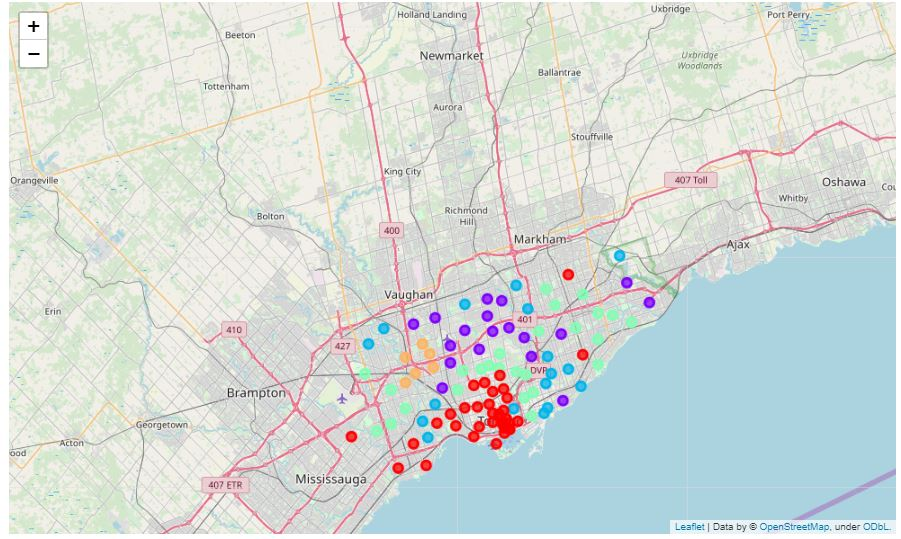

#### Discussion

This study has shown the neighbourhoods that have the best healthcare services and those that have the least. Out of 103 neighborhoods that were included in the analysis, 66 of them do not have any hospital, 27 neighborhoods did not have any medical laboratory and 20 did not have any Dentist's office. The most common type of healthcare facility was the Doctor's Office with 2,238 facilities, followed by the Medical center with 2,055 facilities. This study has also grouped together and revealed in interactive map visualization, the similarities between neighborhoods. The least common types of healthcare facilities included Maternity Clinic (n=3), Eye Doctor (n=6), Acupuncturist (n=7), Mental Health Office (n=7).

#### Conclusion

The results in this study will be useful to a cross section of interested stakeholders in the community. Interested users, ie people who consider healthcare availability as an important factor in decision making about buying property or moving to a new neighborhood, are therefore armed with relevant information, concerning healthcare facility availability that can help them make informed decisions when buying property or moving to a new neighborhood.

#### Limitations
There are some limitations peculiar to this study. for example, it is not possible to confirm that the FourSquare database accounts for all the healthcare facilities in the Toronto neighborhoods. Even for the categories of healthcare facilities that exist in the FourSquare database, it is not possible to confirm that the data is exhaustive.